#**Diseño de solución propuesta**

##**Problema de negocio**
 
La plataforma online requiere una solución que le permita hacer recomendaciones de películas a sus usuarios con el objetivo de que estos tengan una mejor experiencia y esto permita mejorar su fidelización y recomendación a nuevos clientes.


## **Problema analítico**
No existe un algoritmo de recomendación basado en los gustos de los usuarios, que permita generar sugerencias o predecir la utilidad de un ítem específico para un usuario particular. 

##**Diseño de la solución**

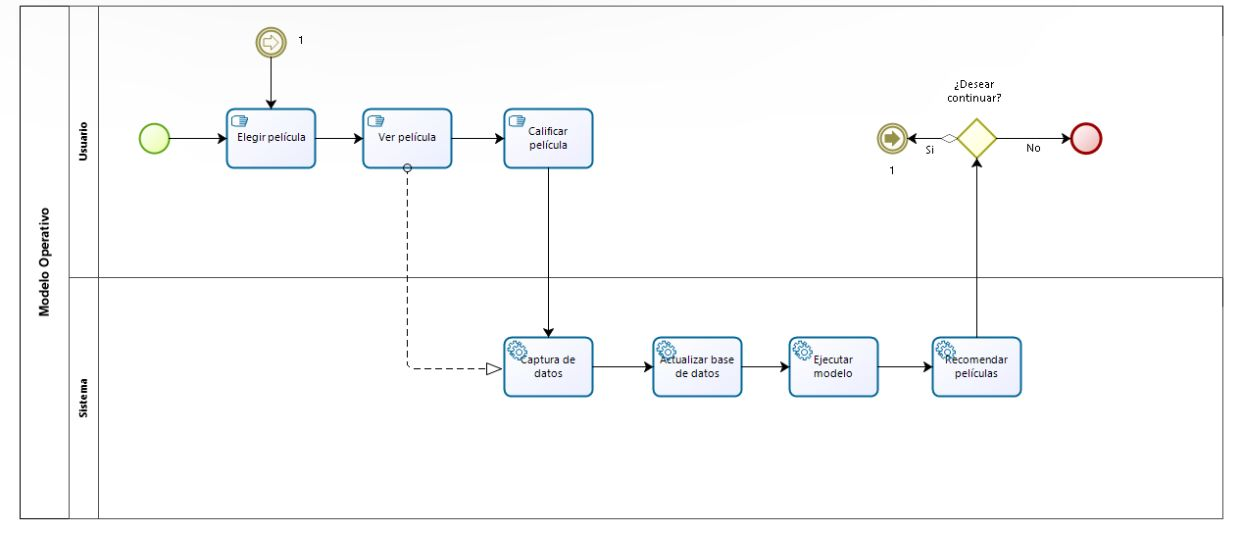

Desde el punto de vista de la implementación operativa se busca diferenciar cuáles son las actvidades genéricas del funcionamiento en el día a día del proceso y quienes serían los responsables. Inicialmente el usuario hace una elección de la película para posteriormente visualizarla y, en el momento en que termine de verla, generar una calificación de la reproducción; en estas dos actividades se hace una captura de datos. Con los registros obtenidos se actualizan las bases de datos para una posterior ejecución del modelo (Con periodicidad diaria) y poder activar las recomendaciones al usuario. El ciclo vuelve a iniciar si el usuario desea permanecer en la plataforma.

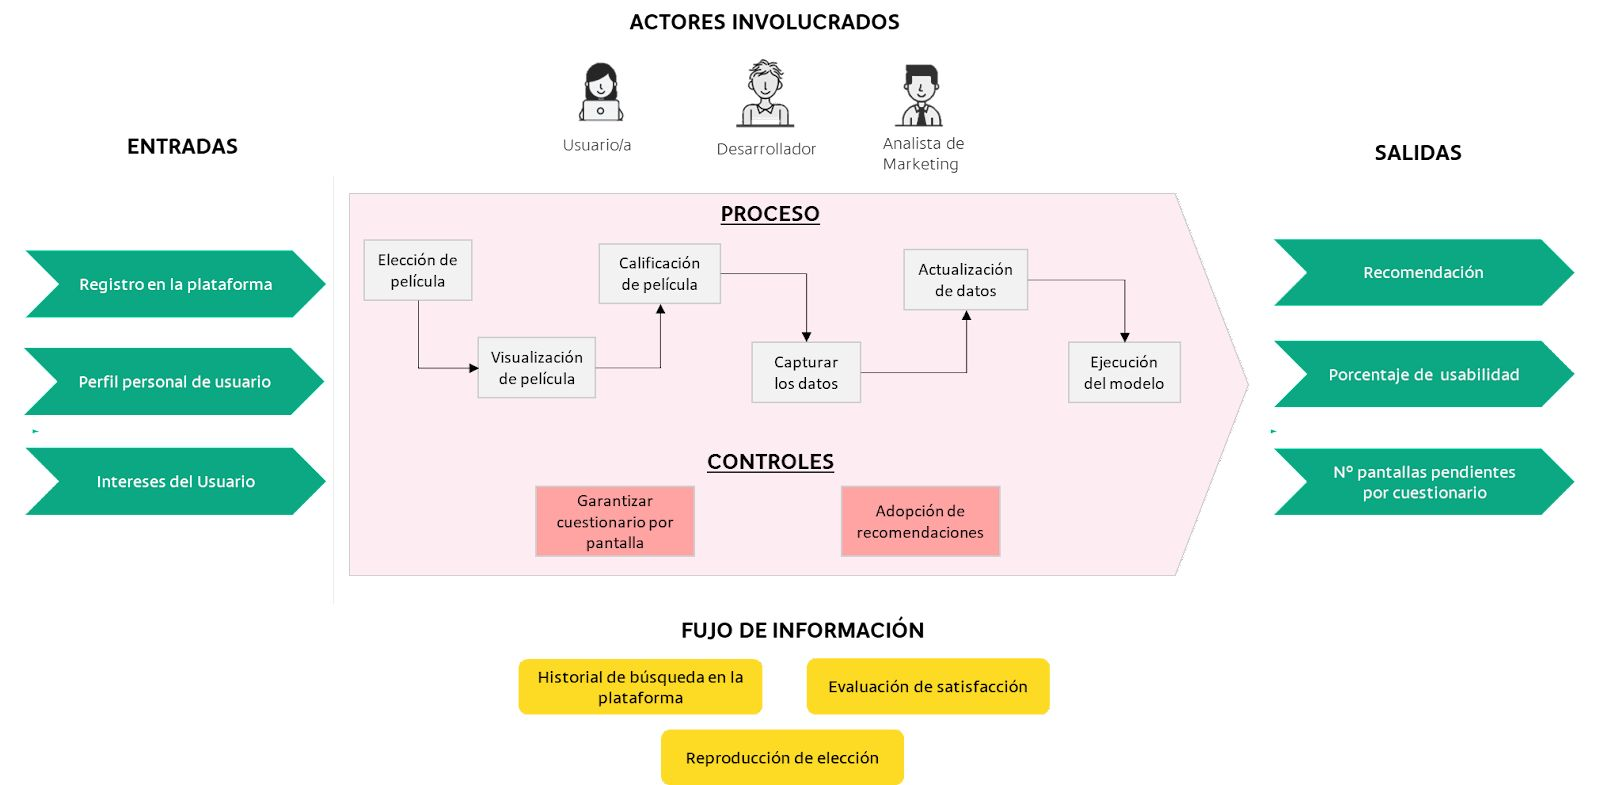

En la búsqueda de dar una mirada integral en la implementación de este modelo, es importante tener en cuenta otras variable adicionales que permiten un buen desarrollo, entre estas están:
- Entradas: Se tuvo en cuenta el registro de la plataforma de los ususario como entrada principal y la segmentación del perfil personal y de intereses de ellos por medio de un cuestionario en el momento en que ingresen por primera vez.
- Proceso: Son las actviidades mencionadas en el modelo operativo anterior
- Controles: En todo proceso existen riesgos operativos que de alguna manera impactan el normal comportamiento, se identificaron dos riesgos y por lo tanto, sep roponen dos controles: Garantizar cuestionario por pantalla (El diligenciamiento del cuestionario de segmentación de perfil e intereses) y adopción de recomendaciones (Revisión de la reproducción de peliculas recomendadas)
- Flujo de información: Se consideraron aquellos movimientos de datos que van surgiendo en el momento en que ocurre el proceso, entre estos están las búsquedas realizadas por el usuario, la reproducción de la película y la evaluación de satisfacción de esta.
- Actores involucrados: Es importante identificar qué recursos humanos aportan al proceso de alguna manera, por tal motivo, los principales actores involucrados son el Usuario, el encargado de desarrollar el modelo y demás propuestas analíticas y, por ultimo, el analista de marketin quien apoya desde la estrategia del mercado.
- Salidas: Estas guardan relación con los resulados del proceso y los controles. La salida principal es la recomendación dada al usuario, la idea es analizar la frecuencia de los tipos de recomendación para diseñar e implementar  estrategias de atracción de usuarios; la segunda salida es referente al porcentaje de usabilidad de las recomendaciones, este indicador tiene planteado inicialmente un valor aceptable para que, en caso de que este porcentaje no cumpla la especificación, se evalúen nuevas recomendaciones o incluso cambios en el modelo; por ultimo, la salida que indica la cantidad de pantallas pendientes por cuestionario, este hace referencia a poder diseñar recordatorios de manera que los usuarios tengan interes por dar a conocer mas de ellos.

# **Comprensión, limpieza transformaciones iniciales**

##**Importar datos y paquetes de datos**

In [ ]:
#Importar datos desde drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar paquetes de datos
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos


In [ ]:
conn=sql.connect('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/2. Aplicaciones en marketing/db_movies')
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos

In [ ]:
#Consultar nombre de tablas
Tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
Tablas

,name
0,ratings
1,movies


## **Examinar Tabla "Movies" con la información de las peliculas**

In [ ]:
#Seleccionar tabla de películas
peliculas = pd.read_sql("SELECT* FROM movies", conn)
peliculas.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


**Se procede a examinar las caracteristicas de la tabla, que no posea datos duplicados, nulos y que contengan los mismos formatos**

In [ ]:
peliculas.shape                    #Tamaño
peliculas.columns                  #Nombre columnas
peliculas.dtypes                   #Tipo de variable
peliculas.duplicated().sum()       #Identificar si existen duplicados
print("El tamaño del DF es",peliculas.shape )
print("El nombre de las columnas del DF es",peliculas.columns )
print("El tipo de variable de cada columna es")
print(peliculas.dtypes )
print("El número de datos duplicados son",peliculas.duplicated().sum() )


El tamaño del DF es (9742, 3)
El nombre de las columnas del DF es Index(['movieId', 'title', 'genres'], dtype='object')
El tipo de variable de cada columna es
movieId     int64
title      object
genres     object
dtype: object
El número de datos duplicados son 0


In [ ]:
#No hay numero significante de datos faltantes en la base de datos Insumo 1
print(peliculas.isnull().sum())                   # Número de nulos por variable
print("---------")
print(peliculas.isnull().sum() / peliculas.shape[0])# % de nulos por variable

movieId    0
title      0
genres     0
dtype: int64
---------
movieId    0.0
title      0.0
genres     0.0
dtype: float64


**Se edita la tabla "peliculas" al separar individualmente por columna cada tipo de genero**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
conn=sql.connect('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/2. Aplicaciones en marketing/db_movies')

peliculas =pd.read_sql("SELECT* FROM movies", conn)
generos=peliculas['genres'].str.split('|')
te = TransactionEncoder()
generos = te.fit_transform(generos)
generos = pd.DataFrame(generos, columns = te.columns_)

In [ ]:
generos.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
peliculas.drop(columns=["genres"], inplace = True)    #Se elimina la columna de géneros en la tabla original.
peliculas= pd.concat([peliculas,generos], axis = 1)   #Se realiza una unión entre la matriz de géneros y la tabla de películas
peliculas.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
dic = {False: 0, True: 1}   #Se reemplazan los falsos y verdaderos por 1 y 0, para facilitar el conteo y posterior visualización en gráficos
peliculas[generos.columns] = peliculas[generos.columns].replace(dic)
peliculas.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## **Examinar Tabla "ratings" con la calificación de las peliculas por usuario**

In [ ]:
#Seleccionar tabla ratings
usuarios = pd.read_sql("SELECT* FROM ratings", conn)
usuarios.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [ ]:
usuarios.shape                    #Tamaño
usuarios.columns                  #Nombre columnas
usuarios.dtypes                   #Tipo de variable
usuarios.duplicated().sum()       #Identificar si existen duplicados
print("El tamaño del DF es",usuarios.shape )
print("El nombre de las columnas del DF es",usuarios.columns )
print("El tipo de variable de cada columna es")
print(usuarios.dtypes )
print("El número de datos duplicados son",usuarios.duplicated().sum() )

El tamaño del DF es (100836, 4)
El nombre de las columnas del DF es Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
El tipo de variable de cada columna es
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
El número de datos duplicados son 0


In [ ]:
#No hay numero significante de datos faltantes en la base de datos Insumo 1
print(usuarios.isnull().sum())                   # Número de nulos por variable
print("---------")
print(usuarios.isnull().sum() / usuarios.shape[0])# % de nulos por variable

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
---------
userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64


**Se edita la tabla "Usuarios" al cambiar el tipo de dato en la columna timestamp, por un formato fecha más comodo para el analisis**

In [ ]:
usuarios['date'] =pd.to_datetime(usuarios['timestamp'], unit='s')
usuarios.drop(columns=["timestamp"],inplace=True)
usuarios.head(3)

,userId,movieId,rating,date
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04


##**Unión de las tablas**

In [ ]:
final= usuarios.merge(peliculas, on='movieId', how='inner')

In [ ]:
final

,index,userId,movieId,rating,date,title,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,100831,610,160341,2.5,2016-11-19 08:55:49,Bloodmoon (1997),0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,100832,610,160527,4.5,2016-11-19 08:43:18,Sympathy for the Underdog (1971),0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,100833,610,160836,3.0,2017-05-03 20:53:14,Hazard (2005),0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,100834,610,163937,3.5,2017-05-03 21:59:49,Blair Witch (2016),0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#**Análisis exploratorio**

¿Cuáles son los 5 géneros de películas más vistas?
¿Cuál es el mes con más visualizaciones? 
¿Cuál es el año con más visualizaciones?
¿Cuáles son los 10 usuarios que más películas calificaron?
¿Cuáles son las 10 películas más vistas?

In [ ]:
final.to_sql("final",conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
conn=sql.connect('final')
cur=conn.cursor()

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('test',), ('final',)]

In [ ]:
final = pd.read_sql("""select * from final""", conn)

**¿Cuáles son los 10 usuarios que más películas calificaron?**



In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/consultas.sql
DROP TABLE IF exists usuarios_top; 

CREATE TABLE usuarios_top AS 
    SELECT strftime('%H', date) hour,  
                        SUM(Action) as Action, 
                        SUM(Adventure) AS Adventure,  
                        SUM(Animation) AS Animation, 
                        SUM(Children) AS Children, 
                        SUM(Comedy) AS Comedy, 
                        SUM(Crime) AS Crime, 
                        SUM(Documentary) AS Documentary, 
                        SUM(Drama) AS Drama, 
                        SUM(Fantasy) AS Fantasy, 
                        SUM("Film-Noir") AS FilmNoir, 
                        SUM(Horror) AS Horror, 
                        SUM(IMAX) AS IMAX, 
                        SUM(Musical) AS Musical, 
                        SUM(Mystery) AS Mystery, 
                        SUM(Romance) AS Romance, 
                        SUM("Sci-Fi") AS SciFi, 
                        SUM(Thriller) AS Thriller, 
                        SUM(War) AS War, 
                        SUM(Western) AS Western 
    FROM final  
    GROUP BY hour;

Overwriting /content/consultas.sql


In [ ]:
ejecutar_sql("/content/consultas.sql", cur)

In [ ]:
pd.read_sql("""select*from usuarios_top""", conn)

,hour,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,00,1349,1010,260,376,1636,768,54,1963,505,49,369,196,143,368,834,753,1168,227,73
1,01,1515,1202,320,442,1910,889,58,2027,560,37,352,208,212,422,889,829,1370,222,101
2,02,1475,1232,393,558,2182,831,64,2054,646,48,353,187,237,341,878,890,1215,216,86
3,03,1287,1026,278,407,1767,652,31,1703,611,32,324,129,180,314,779,733,1065,242,60
4,04,879,747,267,365,1370,555,34,1313,350,55,239,130,172,294,586,585,822,175,56
5,05,804,624,159,212,893,440,49,1061,299,22,207,94,93,229,413,508,794,126,67
6,06,643,584,181,237,878,364,28,862,328,15,135,90,103,141,387,400,488,100,41
7,07,1169,913,310,382,1567,635,31,1406,430,34,245,155,144,247,613,591,884,185,76
8,08,963,672,193,268,1125,581,35,1475,357,24,240,130,131,244,531,444,867,155,76
9,09,775,592,157,205,852,418,37,942,285,27,174,90,75,210,434,469,675,98,39


In [ ]:
cr=pd.read_sql(""" select 
                          rating as Calificación, 
                          count(*) as conteo 
                          from ratings
                          group by rating
                          """, conn)

In [ ]:
data  = go.Bar( x=cr.Calificación,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Calificación",xaxis={'title':'Conteo de Calificación de las peliculas'},yaxis={'title':'Count'})
go.Figure(data,Layout)

#**Selección de algoritmos y técnicas de modelado**

In [ ]:
!pip install surprise

In [ ]:
from ipywidgets import interact ## para análisis interactivo
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise.model_selection import train_test_split

In [ ]:
peli='Toy Story (1995)'


In [ ]:
def recomendacion(peli = list(peliculas['title'])):
     
    ind_pel=peliculas[peliculas['title']==peli].index.values.astype(int)[0]   
    similar_peli = peliculas.corrwith(peliculas.iloc[ind_pel,:],axis=1)
    similar_peli = similar_peli.sort_values(ascending=False)
    top_similar_peli=similar_peli.to_frame(name="correlación").iloc[1:11,]
    top_similar_peli['title']==peliculas["title"]
    
    return top_similar_peli


print(interact(recomendacion))

In [ ]:
############################################################################
#####1. Sistema de recomendación filtro colaborativo basado en usuario #####
############################################################################

In [ ]:
final.to_sql("usuarios",conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
conn=sql.connect('usuarios')
cur=conn.cursor()


In [ ]:
ratings=pd.read_sql('select * from usuarios', conn)

In [ ]:
watcher = Reader(rating_scale=(0, 10))

In [ ]:
data   = Dataset.load_from_df(ratings[['userId','movieId','rating']], watcher)

In [ ]:
models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline()] 
results = {}

In [ ]:
for model in models:
 
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result


performance_df = pd.DataFrame.from_dict(results).T
performance_df.sort_values(by='RMSE')



,MAE,RMSE,fit_time,test_time
knns.KNNBaseline,0.668638,0.874903,0.264487,2.392560
knns.KNNWithZScore,0.680939,0.897469,0.208111,2.148749
knns.KNNWithMeans,0.687930,0.900076,0.136795,1.964951
knns.KNNBasic,0.726230,0.947743,0.120164,2.145238


In [ ]:
param_grid = { 'sim_options' : {'name': ['msd','cosine'], \   ### Mean square diff
                                'min_support': [5], \         ## Vecinos minimos necesarios para realixar la predicción  ###Agregar mas agrupaciones
                                'user_based': [False, True]}  ## Basado en usuario (True) o en el items/calificaciones (False)
             }

### MAE

In [ ]:
gridsearchKNNWithMeans = GridSearchCV(KNNWithMeans, param_grid, measures=['mae'], \
                                      cv=2, n_jobs=2)
                                    
gridsearchKNNWithMeans.fit(data)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
gridsearchKNNWithMeans.best_params["mae"]

{'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': True}}

In [ ]:
gridsearchKNNWithMeans.best_score["mae"]

0.707150532190556

###RMSE

In [ ]:
gridsearchKNNWithMeans = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], \
                                      cv=2, n_jobs=2)
                                    
gridsearchKNNWithMeans.fit(data)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
gridsearchKNNWithMeans.best_params["rmse"]

{'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': True}}

In [ ]:
gridsearchKNNWithMeans.best_score["rmse"]

0.9275962529995977